In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import yaml

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

import main
import utils

# Name of results folder to plot.
results_folder = 'experiments/calibrate/single/output_1_20240621_000000'

with open(f'{results_folder}/config.yaml') as configfile:
    config = yaml.safe_load(configfile)

with open(f'{results_folder}/results.pkl', 'rb') as file:
    results_dict = pickle.load(file)

In [2]:
tau_k_pairs = []
for run_no in results_dict:
    tau_k_pairs.append([run_no['tau_val'], run_no['k_val']])

map_estimate = utils.get_MAP(tau_k_pairs)
print("MAP Estimate:", map_estimate)

MAP Estimate: [9.6521867  0.26180914]


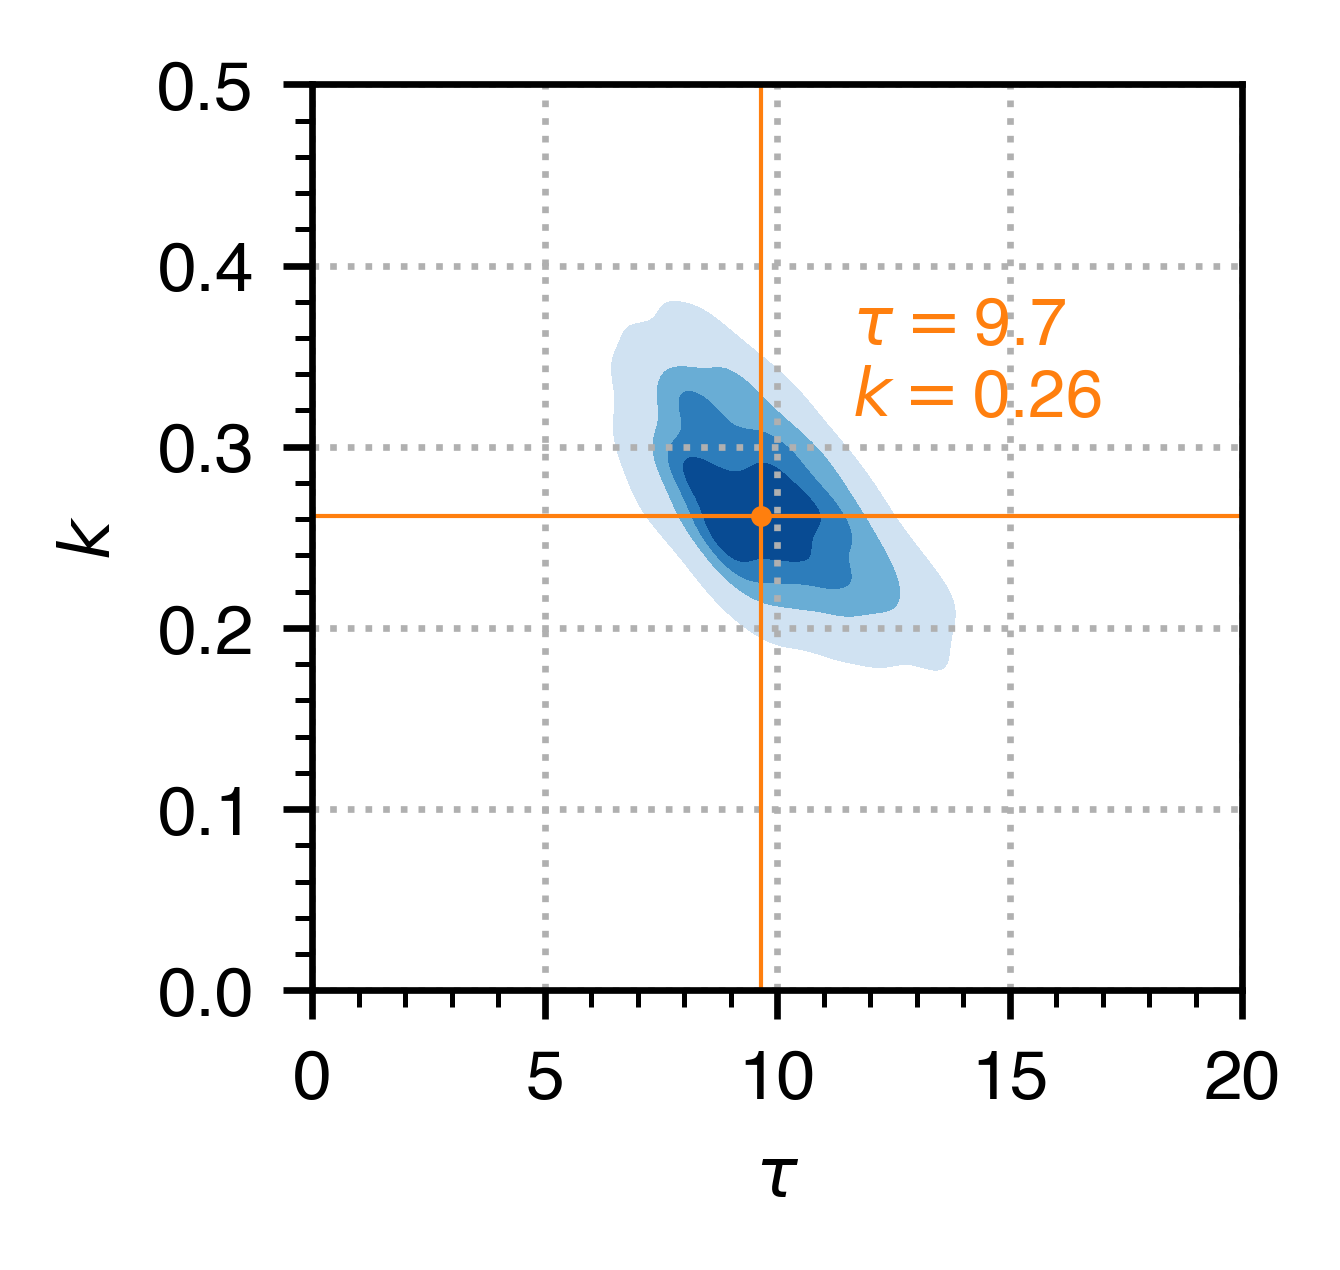

In [3]:
fig, axs = plt.subplots(1, 1, figsize=(2, 2))
fig.dpi = 600

tau_list, k_list = [], []
for run_no in results_dict:
    tau_list.append(run_no['tau_val'])
    k_list.append(run_no['k_val'])

df = pd.DataFrame.from_dict({'tau': tau_list, 'k': k_list}, orient='columns')
sns.kdeplot(data=df, x='tau', y='k', fill=True, cmap='Blues', ax=axs, levels=5)

axs.set_xlim(0, 20)
axs.set_ylim(0, 0.5)
axs.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])
axs.set_xticks([0, 5, 10, 15, 20])
axs.set_xlabel(r'$\tau$', fontsize='small')
axs.set_ylabel(r'$k$', fontsize='small')
axs.minorticks_on()
tau_text = f'{map_estimate[0]:.1f}'
k_text = f'{map_estimate[1]:.2f}'
axs.axhline(map_estimate[1], color='#ff7f0e', linewidth=0.5)
axs.axvline(map_estimate[0], color='#ff7f0e', linewidth=0.5)
axs.plot(map_estimate[0], map_estimate[1], '.', color='#ff7f0e', markersize=3)
axs.text(11.6, 0.317, r'$\tau=$' + f'{tau_text}' + '\n' + r'$k=$' + f'{k_text}', fontsize=8, color='#ff7f0e')
axs.grid(True, linestyle=':')
plt.tick_params(axis='both', which='both', labelsize='small')

plt.show()

In [4]:
seed = 16
np.random.seed(seed)

ensemble_count = config['ENSEMBLE_COUNT']
reversal_count = config['REVERSAL_COUNT']
trial_count = config['TRIAL_COUNT']
tau_val = map_estimate[0]
k_val = map_estimate[1]
k_decay = 0

run_output = main.run_reversal_learning(ensemble_count, reversal_count, trial_count, tau_val, k_val, k_decay)

100%|██████████| 100/100 [00:00<00:00, 181.53it/s]


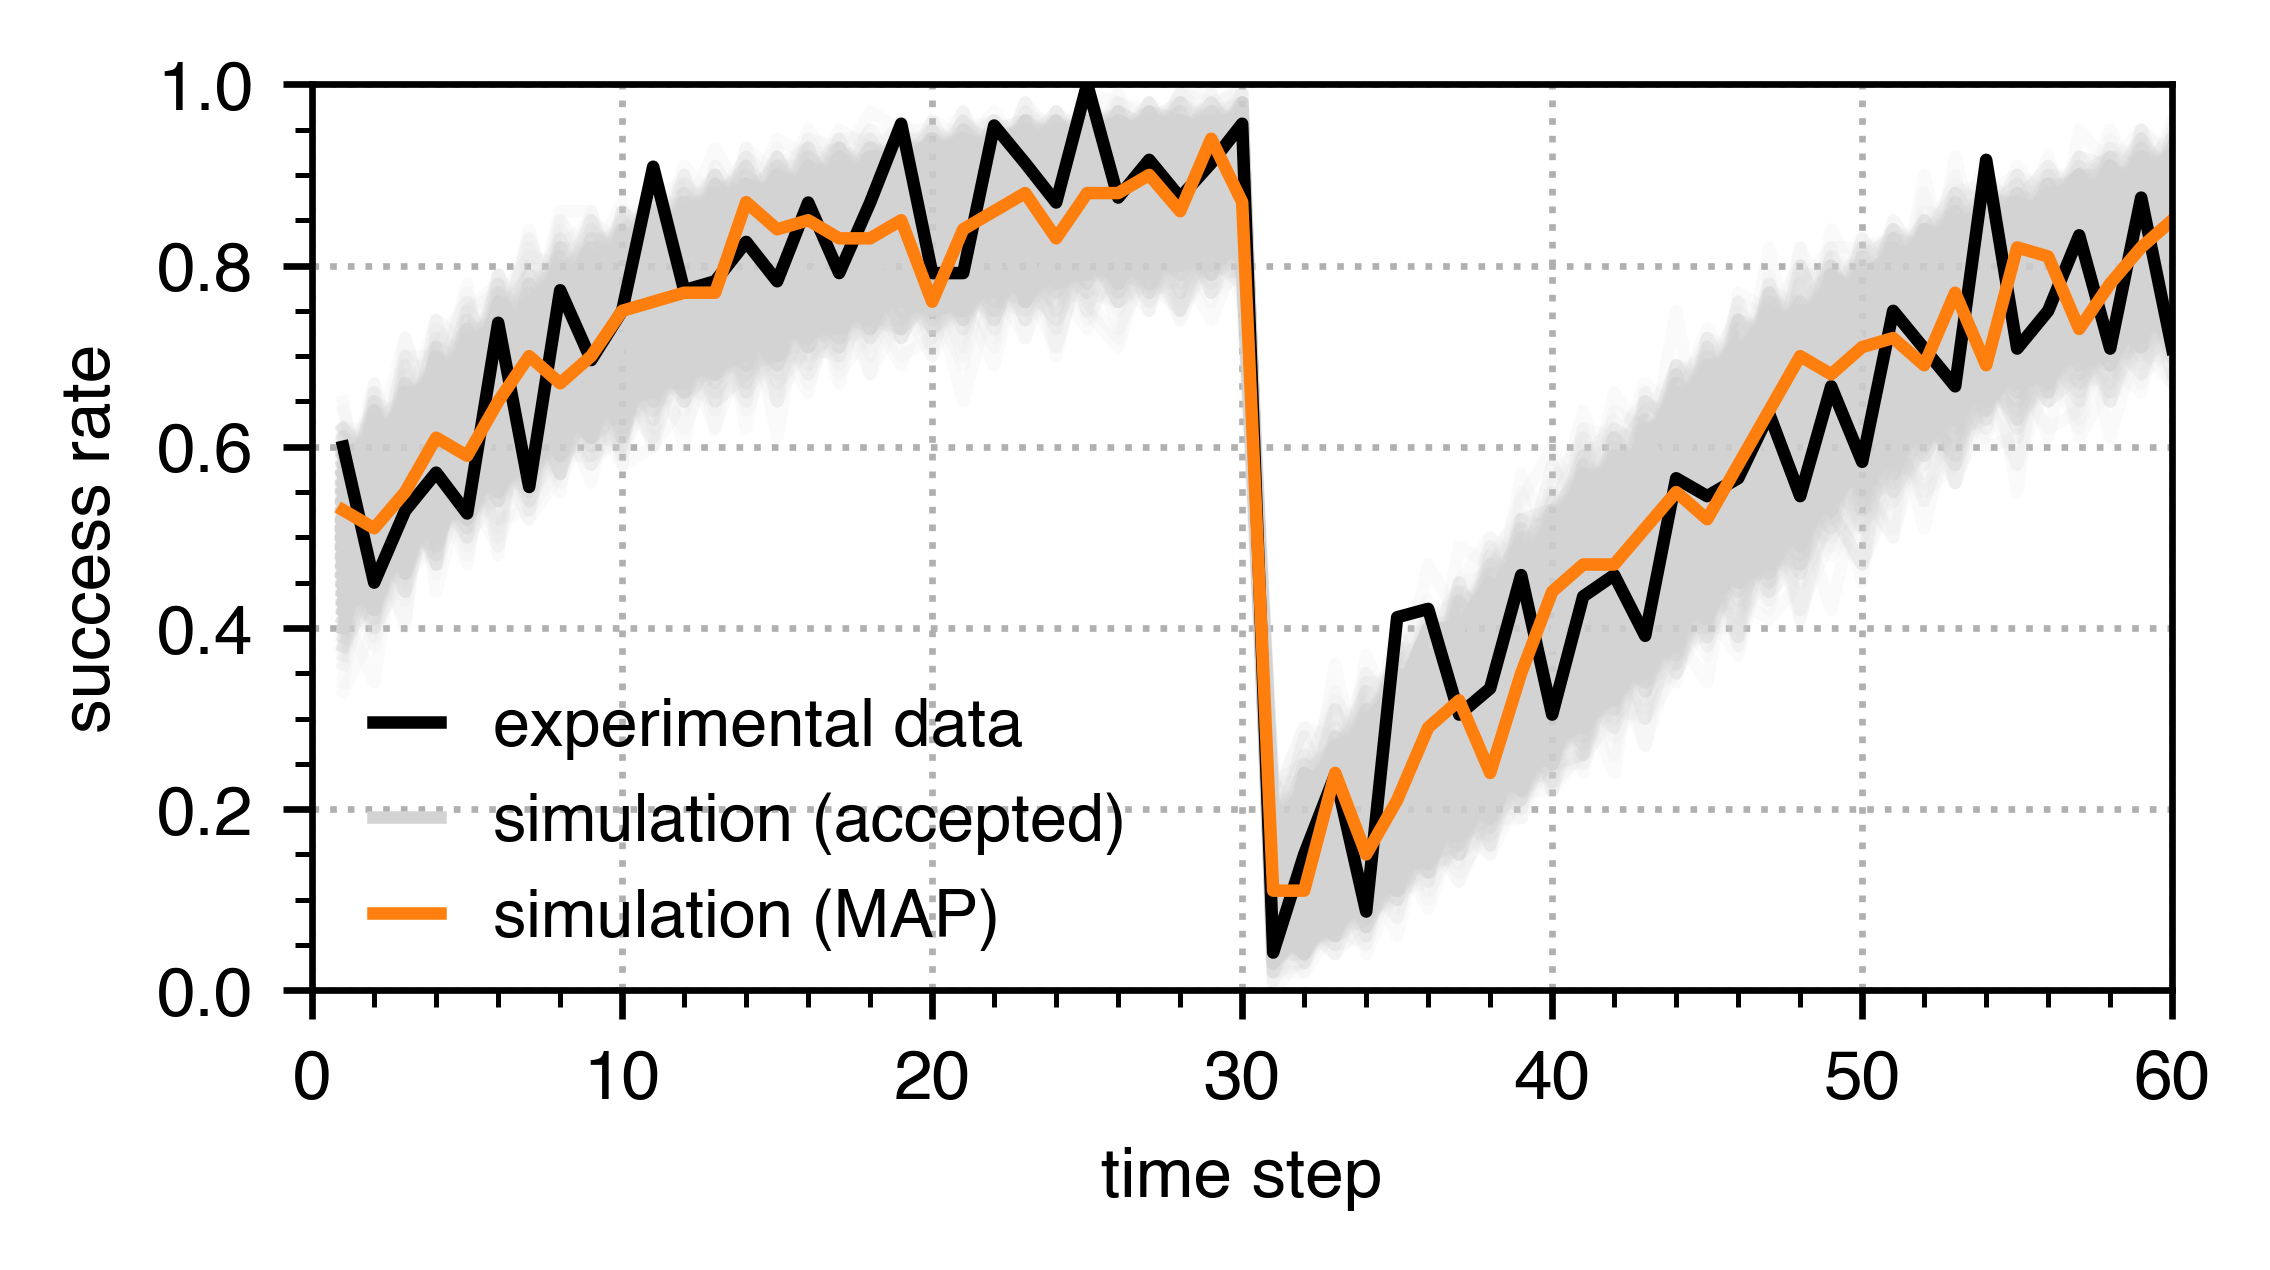

In [5]:
df_target = pd.read_csv('data/target_data_single.csv', header=None)
run_target = df_target[0].tolist()
run_target = run_target[:60]

run_list = []
for run_no in results_dict:
    run_list.append(run_no['run'])

fig, ax = plt.subplots(1, 1, figsize=(4, 2))
fig.dpi = 600

line1, = plt.plot(np.arange(1,61,1), run_list[0], color='lightgrey', linewidth=1.5, alpha=1, label='simulation (accepted)')
for run_plot in run_list[1:]:
    plt.plot(np.arange(1,61,1), run_plot, color='lightgrey', linewidth=1.5, alpha=0.1)
line2, = plt.plot(np.arange(1,61,1), run_target, color='black', linewidth=1.5, label='experimental data')
line3, = plt.plot(np.arange(1,61,1), run_output['run_stat'], color='#ff7f0e', linewidth=1.5, label='simulation (MAP)')

plt.ylabel('success rate', fontsize='small')
plt.xlabel('time step', fontsize='small')
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_xticks([0, 10, 20, 30, 40, 50, 60])
plt.ylim(0, 1)
plt.xlim(0, 60)
plt.legend(frameon=False, fontsize=8, handlelength=1, bbox_to_anchor=(0.47, 0.39), handles=[line2, line1, line3], labels=['experimental data', 'simulation (accepted)', 'simulation (MAP)'])
ax.minorticks_on()
ax.grid(which='major', linestyle=':')
plt.tick_params(axis='both', which='both', labelsize='small')

plt.show()